In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shrit/Top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

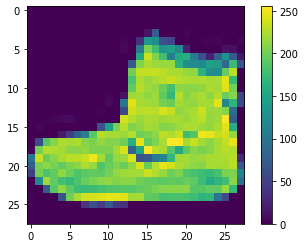

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images/255.0
test_images = test_images/255.0

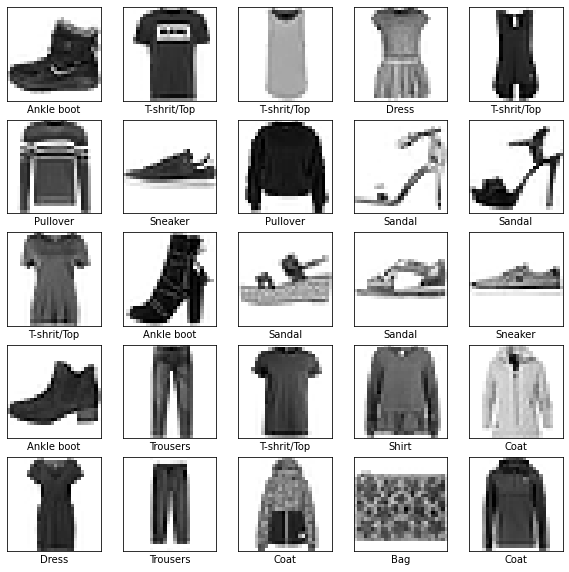

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#budowa modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8224
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3356 - accuracy: 0.8778
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3144 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [12]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'Test modelu -> accuracy: {test_acc}, loss: {test_loss}')

313/313 - 1s - loss: 0.3265 - accuracy: 0.8854 - 758ms/epoch - 2ms/step
Test modelu -> accuracy: 0.8853999972343445, loss: 0.3264670670032501


Proces prognozowania z wykorzystaniem wytrenowanego modelu

In [13]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [15]:
predictions[0]

array([2.0782311e-08, 2.0212855e-10, 4.1908761e-09, 1.1020929e-12,
 5.0502176e-09, 6.6556160e-05, 1.8191275e-09, 1.2127721e-03,
 1.2702409e-10, 9.9872059e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
def plot_image(i,predictions_array,true_label,img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'

    plt.xlabel("{} {:2.0f}% ({})".format(
                        class_names[predicted_label],
                        100*np.max(predictions_array),
                        class_names[true_label]
                    ),
               color=color)

In [19]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

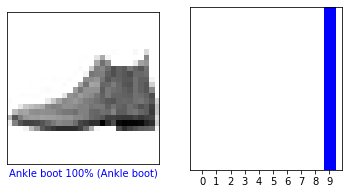

In [20]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

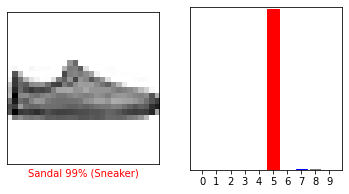

In [21]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

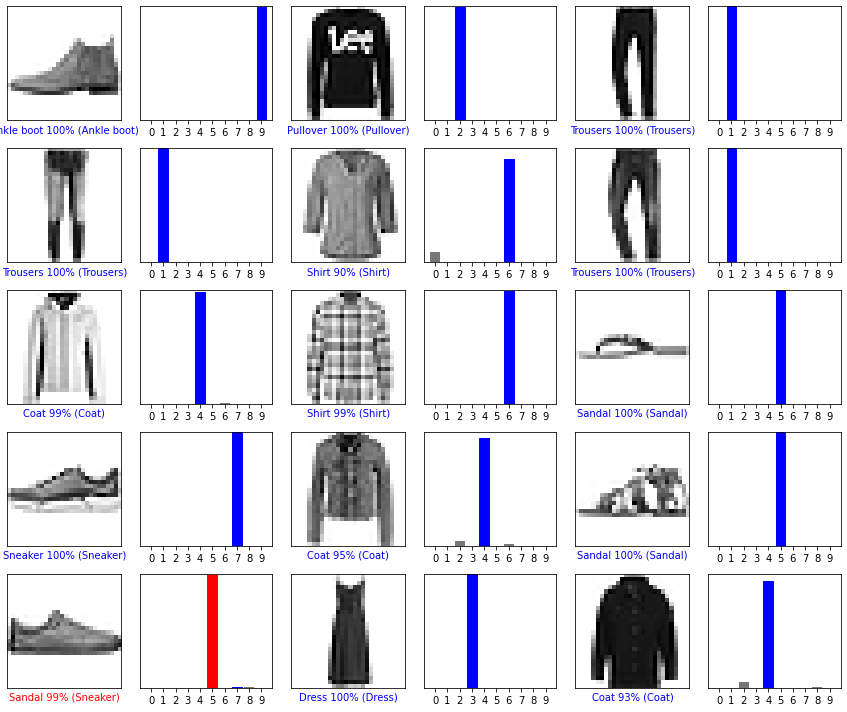

In [22]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

Użycie wyszkolonego modelu, w celu prognozowania pojedynczego obrazu

In [23]:
img = test_images[1]
print(img.shape)

(28, 28)


In [24]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [25]:
print(type(img))

<class 'numpy.ndarray'>


In [26]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[6.5907974e-05 2.1005285e-13 9.9792361e-01 1.4019219e-10 1.2252098e-03
  8.6247702e-12 7.8532303e-04 4.1999112e-14 5.6360840e-11 1.0934887e-11]]


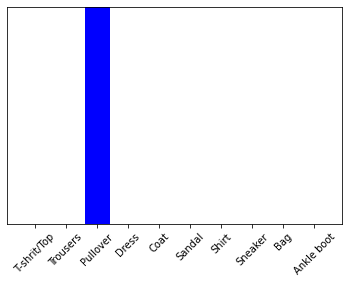

In [27]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [28]:
np.argmax(predictions_single[0])

2